In [1]:
from os import listdir
from os.path import isfile, join
import typing
from typing import List
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.ion()

In [2]:
data_path = "/Users/lindsayedwards/teas-data/gnw/e-coli-full/"
tsv_files = [f for f in listdir(data_path) if f.endswith(".tsv") and "noise" not in f]

In [3]:
tsv_files

['Ecoli_proteins_wildtype.tsv',
 'Ecoli_dualknockouts.tsv',
 'Ecoli_dualknockouts_perturbations.tsv',
 'Ecoli_multifactorial.tsv',
 'Ecoli_proteins_knockdowns.tsv',
 'Ecoli_goldstandard_signed.tsv',
 'Ecoli_dream4_timeseries.tsv',
 'Ecoli_proteins_knockouts.tsv',
 'Ecoli_knockouts.tsv',
 'Ecoli_multifactorial_perturbations.tsv',
 'Ecoli_dualknockouts_indexes.tsv',
 'Ecoli_wildtype.tsv',
 'Ecoli_dream4_timeseries_perturbations.tsv',
 'Ecoli_knockdowns.tsv',
 'Ecoli_proteins_multifactorial.tsv',
 'Ecoli_normalization_constant.tsv',
 'Ecoli_goldstandard.tsv',
 'Ecoli_proteins_dream4_timeseries.tsv',
 'Ecoli_proteins_dualknockouts.tsv']

In [4]:
all_dfs = [pd.read_csv(join(data_path, f), sep="\t") for f in tsv_files]

In [5]:
col_size = [df.shape[1] for df in all_dfs]
num_nodes = max(set(col_size), key=col_size.count) # take the mode as the most probable number of nodes

Weird things happening with dataframe shape.

In [7]:
[print(idx, n, df.shape) for (n, (idx, df)) in zip(tsv_files, enumerate(all_dfs)) if df.shape[1] != num_nodes]

5 Ecoli_goldstandard_signed.tsv (3647, 3)
6 Ecoli_dream4_timeseries.tsv (210, 1566)
10 Ecoli_dualknockouts_indexes.tsv (754, 2)
15 Ecoli_normalization_constant.tsv (0, 1)
16 Ecoli_goldstandard.tsv (2447659, 3)
17 Ecoli_proteins_dream4_timeseries.tsv (210, 1566)


[None, None, None, None, None, None]

In [8]:
all_dfs[2].head()

,acrR,acrA,acrB,micF,ada,alkB,alkA,aidB,adiY,adiA,...,yoeB,zntR,zntA,zraP,zur,ykgO,znuC,znuA,ykgM,znuB
0,0.024964,0.030968,0.026008,0.028449,0.036823,0.0239,0.022802,0.019526,0.026287,0.017049,...,0.018421,0.05886,0.031402,0.021819,0.042343,0.036572,0.021707,0.0278,0.02223,0.079862
1,0.024964,0.030968,0.026008,0.028449,0.036823,0.0239,0.022802,0.019526,0.026287,0.017049,...,0.018421,0.05886,0.031402,0.021819,0.042343,0.036572,0.021707,0.0278,0.02223,0.079862
2,0.024964,0.030968,0.026008,0.028449,0.036823,0.0239,0.022802,0.019526,0.026287,0.017049,...,0.018421,0.05886,0.031402,0.021819,0.042343,0.036572,0.021707,0.0278,0.02223,0.079862
3,0.024964,0.030968,0.026008,0.028449,0.036823,0.0239,0.022802,0.019526,0.026287,0.017049,...,0.018421,0.05886,0.031402,0.021819,0.042343,0.036572,0.021707,0.0278,0.02223,0.079862
4,0.024964,0.030968,0.026008,0.028449,0.036823,0.0239,0.022802,0.019526,0.026287,0.017049,...,0.018421,0.05886,0.031402,0.021819,0.042343,0.036572,0.021707,0.0278,0.02223,0.079862


So there is a time component. Might be fun for RNN models!?? But we should remove that column

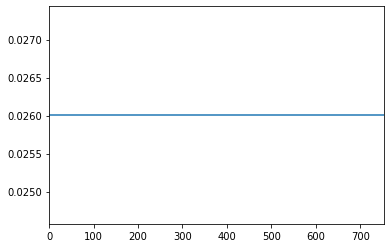

In [11]:
all_dfs[2]['acrB'].plot()

In [10]:
from pandas import DataFrame

In [11]:
merged_df = all_dfs[0]

In [12]:
merged_df.shape

(1, 500)

In [13]:
for df in all_dfs[1:]:
    if df.shape[1] != 500:
        if df.shape[1] == 501:
            merged_df = merged_df.append(df.iloc[:,1:], sort=True)
        else:
            pass
    else:
        merged_df = merged_df.append(df, sort=True)

In [14]:
merged_df.head()

,acrA,acrB,acrD,adrA,ahpC,ahpF,alaS,allA,allB,allC,...,ynfE,ynfF,ynfG,ynfH,yoaG,yqjA,yrbL,ytfE,zinT,zwf
0,0.294664,0.092584,0.488607,0.174094,0.271341,0.378001,0.648849,0.005223,0.020562,0.012033,...,0.084998,0.050667,0.109524,0.107323,0.354529,0.670635,0.693253,0.333190,0.524343,0.191915
0,0.264658,0.058048,0.470147,0.296536,0.295839,0.323439,0.622076,0.016143,0.023722,0.008969,...,0.068630,0.016361,0.146048,0.056404,0.370408,0.676422,0.619028,0.402391,0.677500,0.137000
1,0.331810,0.071026,0.472651,0.179991,0.384327,0.395325,0.596240,0.691944,0.684229,0.454941,...,0.172619,0.011175,0.110215,0.118315,0.345721,0.564084,0.680821,0.413307,0.568779,0.180200
2,0.335241,0.141966,0.392059,0.187554,0.375568,0.370825,0.597947,0.023230,0.036065,0.005655,...,0.099305,0.050536,0.222056,0.096309,0.417925,0.707691,0.552163,0.384903,0.610966,0.210638
3,0.361994,0.153502,0.446023,0.177590,0.293448,0.436567,0.748479,0.000000,0.014571,0.006275,...,0.093587,0.056580,0.167252,0.105229,0.392862,0.725482,0.623140,0.438423,0.604094,0.135744


In [15]:
merged_df.shape

(4244, 500)

Let's have a look at the joined data:

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=2)

In [18]:
transformed_data = pca.fit_transform(merged_df)

In [24]:
transformed_data[:,0]

array([-1.44832089, -1.36241293, -1.58350836, ...,  7.34625277,
        7.19293855,  7.57571385])

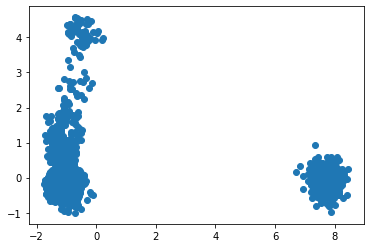

In [25]:
plt.scatter(x = transformed_data[:,0], y = transformed_data[:,1])

In [14]:
save_path = join(data_path, "merged.csv")

In [15]:
merged_df.to_csv(save_path)